### Import Dependencies

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [6]:
#### Plotting Styles
plt.style.use('fivethirtyeight')

In [117]:
#### Helper function to scale data
def scale_data(data, scale_method='standard'):

        if scale_method == 'standard':
            scaler = StandardScaler()
        elif scale_method == 'minmax':
            scaler = MinMaxScaler()
        elif scale_method == 'robust':
            scaler = RobustScaler()
        else:
            raise ValueError("Invalid scale method. Choose 'standard', 'minmax' or 'robust'.")

        pipeline = Pipeline([('scaler', scaler)])
        scaled_data = pipeline.fit_transform(data)
        return pd.DataFrame(scaled_data, columns=data.columns)

In [66]:
#### Evalutaion metrics
def get_silhouette_eval(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    print(f"Average Silhouette Score: {silhouette_avg}")

def get_davies_bouldin_score(data, labels):
    dbi = davies_bouldin_score(data, labels)
    print(f"Davies-Bouldin Index: {dbi}")

def get_inertia_score(inertias):
    inertia = inertias[-1]
    print(f"Inertia: {inertia}")

def get_cluster_summary(data):
    cluster_summary = data.copy()
    cluster_summary['Cluster'] = cluster_labels
    print(cluster_summary.groupby('Cluster').mean())

In [8]:
class KMeansClustering:
    def __init__(self, data):
        self.data=data
        self.inertias = []

    def find_inertias(self, max_clusters=10):
        self.inertias = []
        for i in range(1, max_clusters+1):
            kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
            kmeans.fit(self.data)
            self.inertias.append(kmeans.inertia_)
            
    def display_elbow_plot(self):
        if not self.inertias:
            raise ValueError("Inertias have not been calculated, Make sure you have called find_inertias first.")
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.inertias) + 1), self.inertias, marker='o')
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS (Inertia)')
        plt.show()
        
    def run_kmeans(self, n_clusters):
        """Run KMeans with the specified number of clusters."""
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
        self.cluster_labels = kmeans.fit_predict(self.data)
        return self.cluster_labels
    

#### Read csv into Pandas dataframe

In [9]:
df = pd.read_csv("Mall_Customers.csv")
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
#### Get dataframe dimensionality
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 200
Number of columns: 5


In [11]:
#### Get summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Check for NULL values

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Data Visualizations

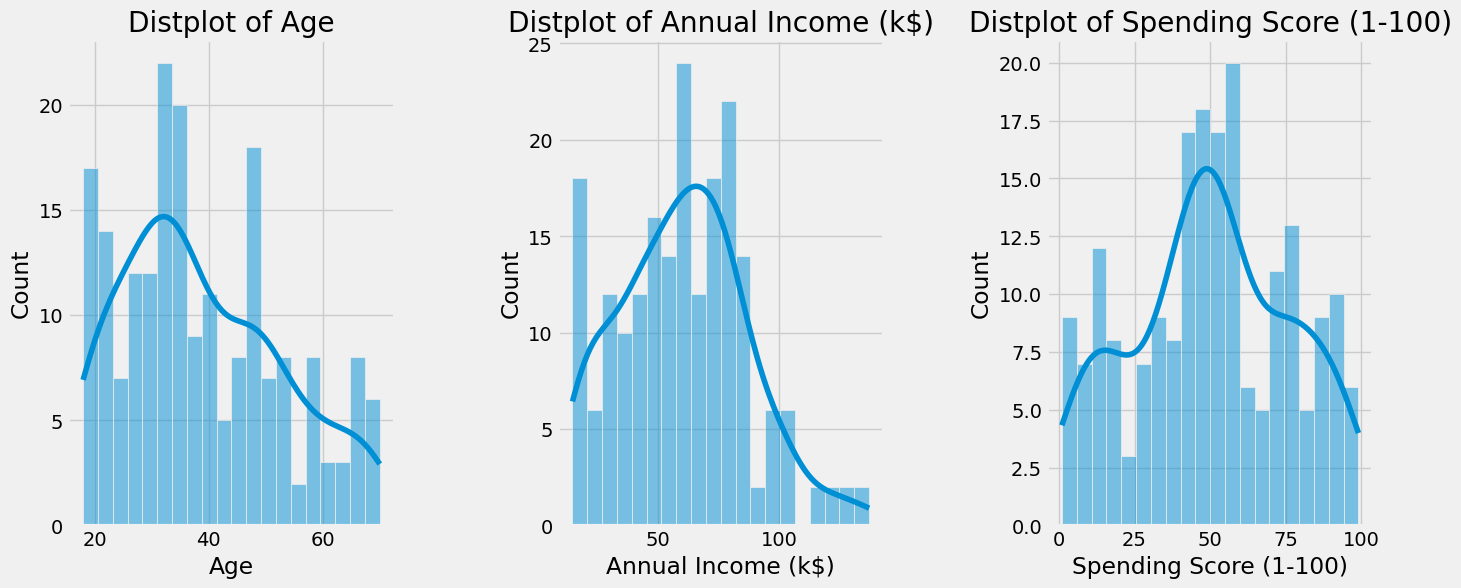

In [13]:
#### Check variables distributions
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  # Use histplot with kde for smoother visualization
    plt.title(f'Distplot of {x}')
plt.show()

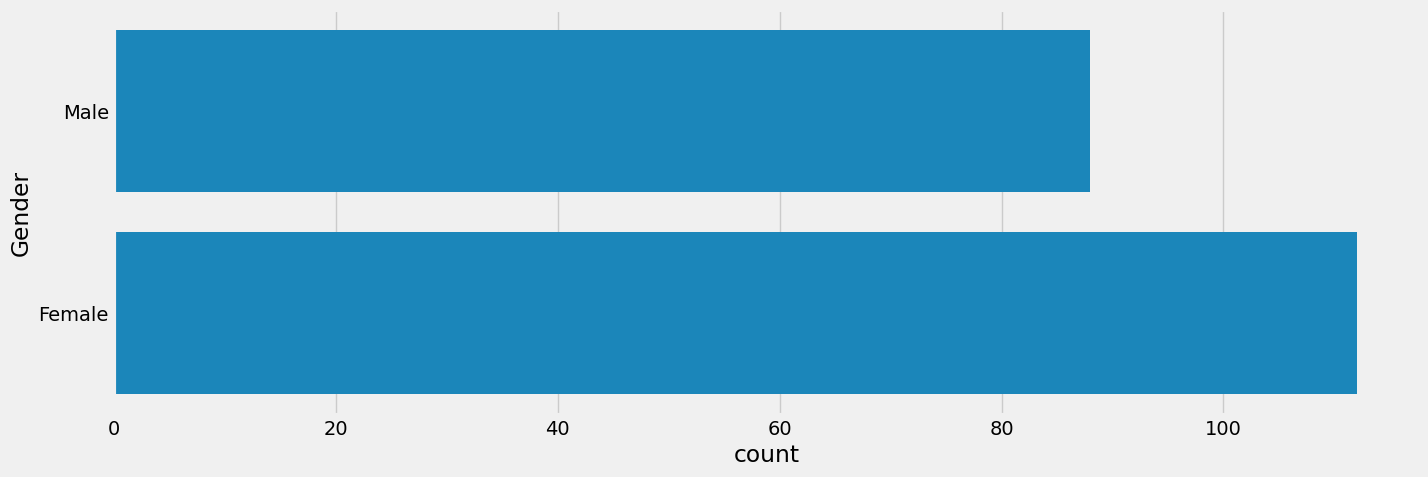

In [14]:
#### Check Gender distribution
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

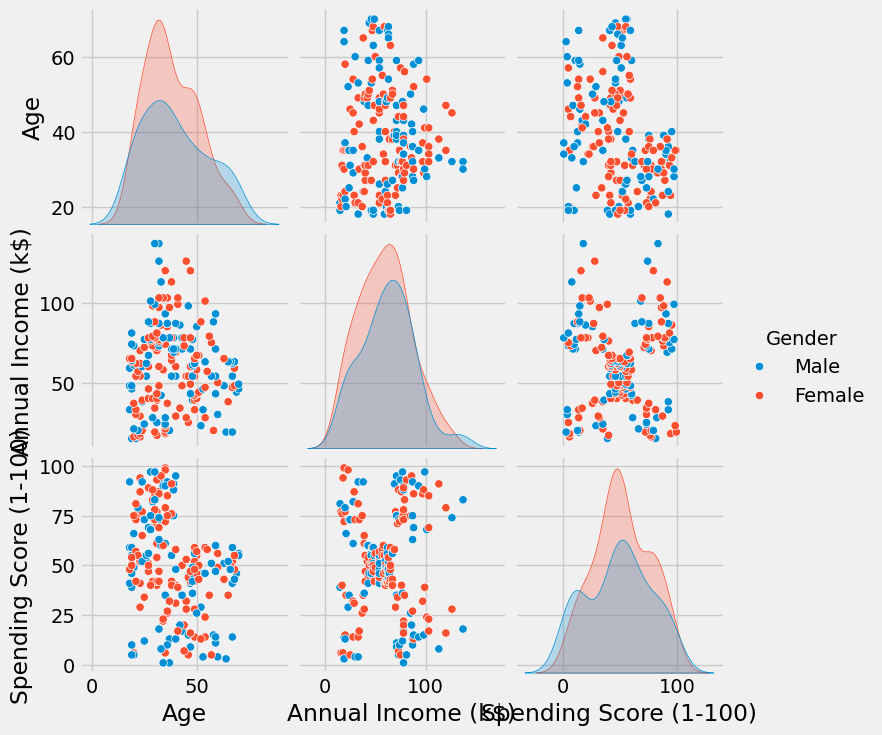

In [15]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')
plt.show()

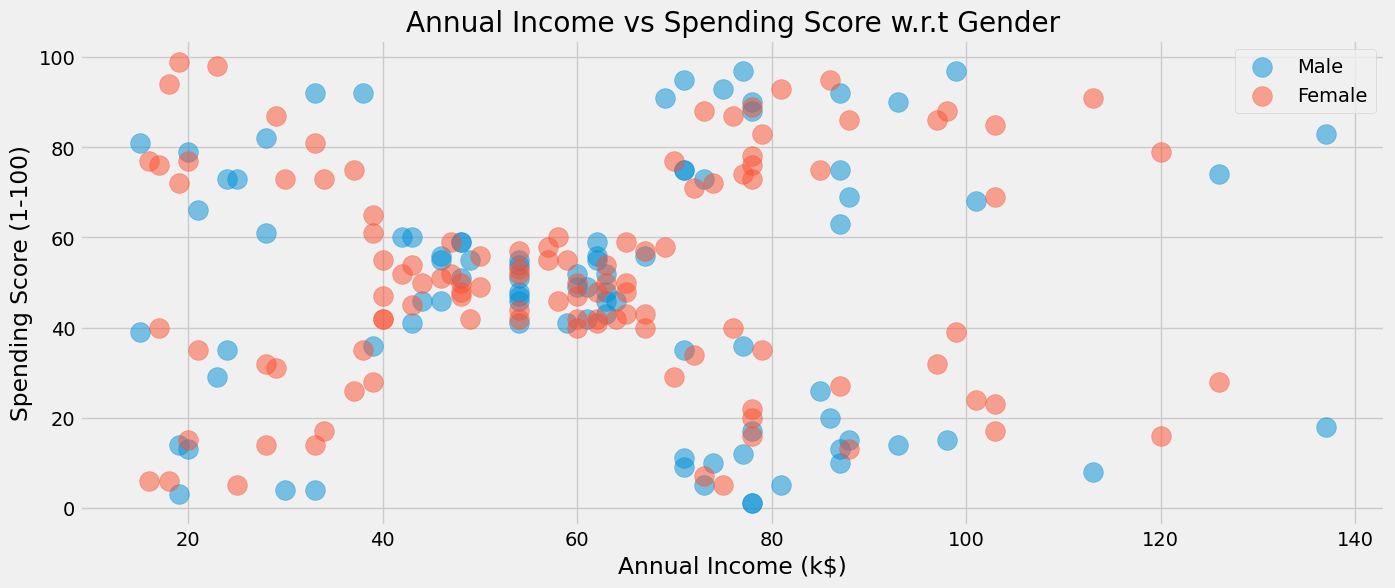

In [16]:
#### Visualize Annual Income vs Spending Score
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

C:\Users\oshan\AppData\Local\Temp\ipykernel_27024\164604466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
C:\Users\oshan\AppData\Local\Temp\ipykernel_27024\164604466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
C:\Users\oshan\AppData\Local\Temp\ipykernel_27024\164604466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')


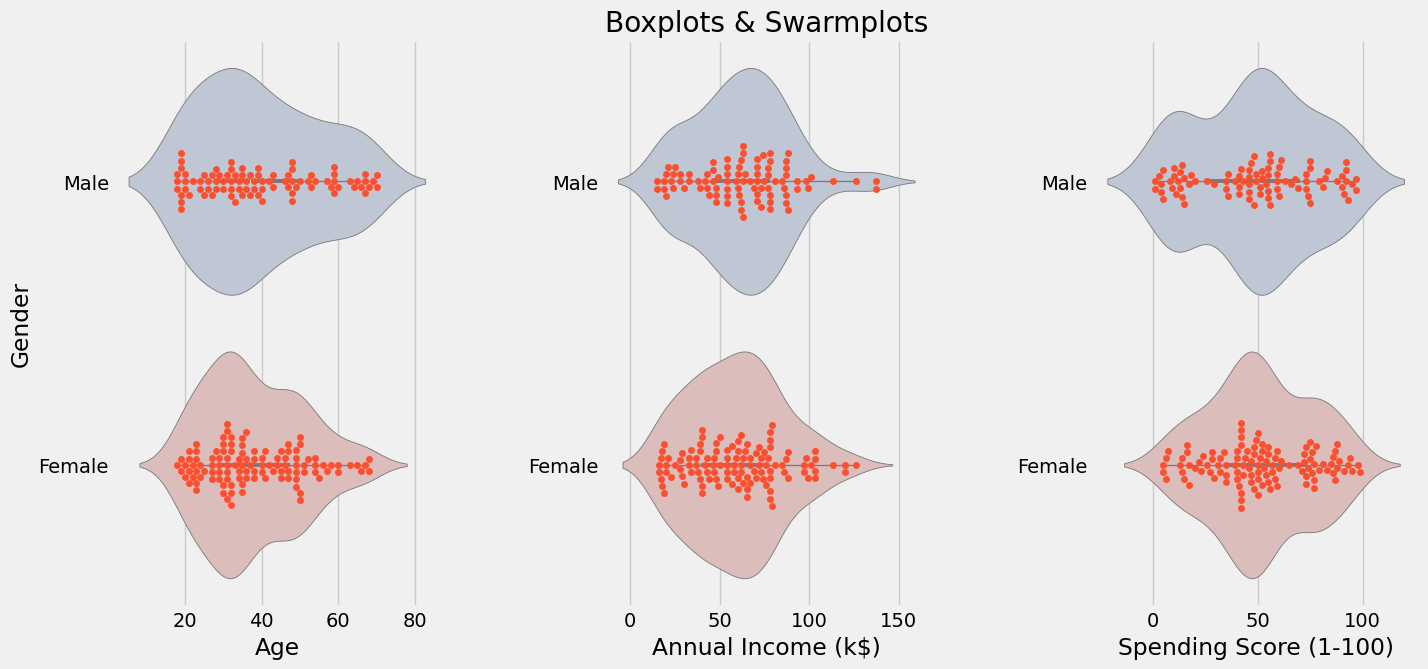

In [17]:
#### Violin + Swarm Plots
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

#### KMeans Clustering

In [70]:
data_X1 = df[['Age', 'Spending Score (1-100)']]
data_X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data_X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

##### Round 1: Age and Spending Score

In [71]:
#### Initialize with class
cluster_X1 = KMeansClustering(data_X1)

In [72]:
#### Find Inertias
cluster_X1.find_inertias(max_clusters=10)

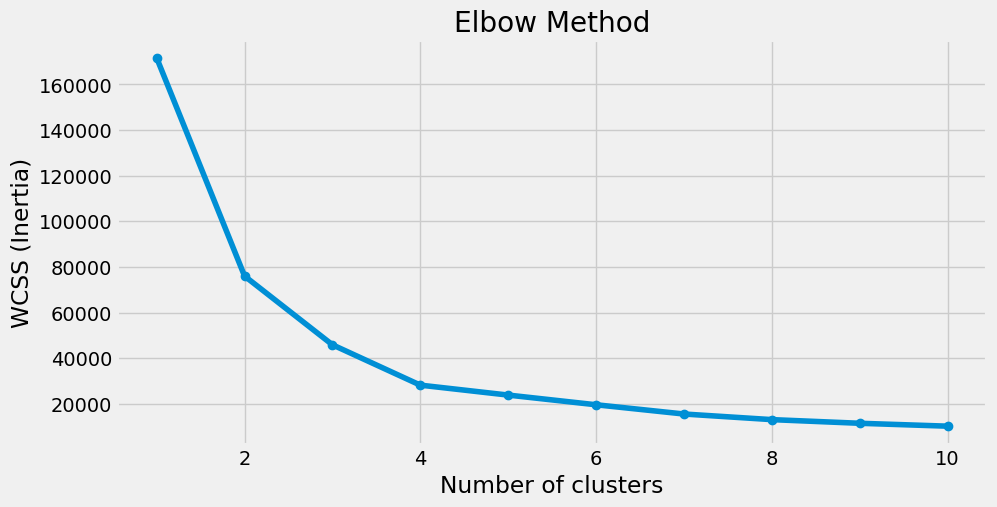

In [73]:
#### Display Elbow Plot
cluster_X1.display_elbow_plot()

In [74]:
cluster_labels_X1 = cluster_X1.run_kmeans(n_clusters=4)

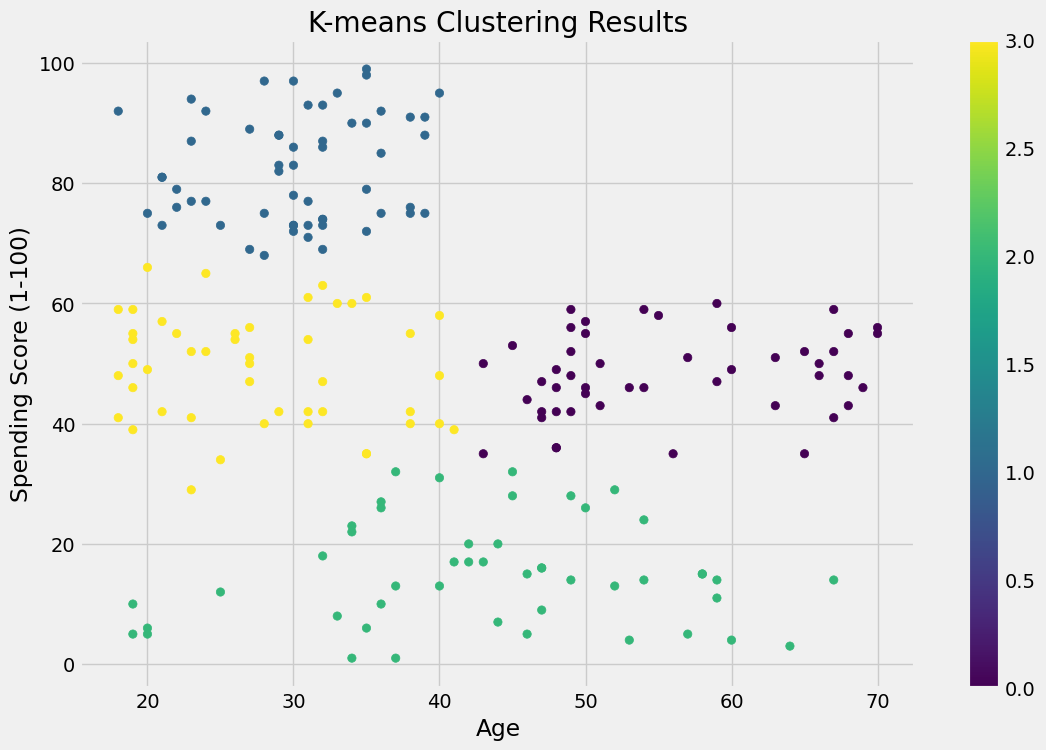

In [75]:
#### Visualize Clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_X1['Age'], data_X1['Spending Score (1-100)'], c=cluster_labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

In [76]:
get_silhouette_eval(data_X1, cluster_labels_X1)

Average Silhouette Score: 0.49973941540141753


In [77]:
get_davies_bouldin_score(data_X1, cluster_labels_X1)

Davies-Bouldin Index: 0.6869328339833636


In [78]:
get_inertia_score(cluster_X1.inertias)

Inertia: 10186.501073242376


In [79]:
get_cluster_summary(data_X1)

               Age  Spending Score (1-100)
Cluster                                   
0        55.708333               48.229167
1        30.175439               82.350877
2        43.291667               15.020833
3        27.617021               49.148936


**1. Silhouette Score:
Range: -1 to 1
Interpretation:
Close to 1: Indicates that the samples are well-clustered. They are close to their own cluster center and far from other clusters.
Around 0: Indicates that samples are on or very close to the decision boundary between two neighboring clusters.
Close to -1: Indicates that samples might have been assigned to the wrong cluster and are closer to another cluster’s center.
Use: High average silhouette scores generally indicate a good clustering structure, with well-separated and cohesive clusters.

**2. Davies-Bouldin Index (DBI):
Range: 0 to ∞
Interpretation:
Lower Values: Indicate better clustering. It means clusters are more distinct from each other and internally cohesive.
Higher Values: Suggest that clusters are less distinct and have more overlap.
Use: The DBI provides a measure of how well-separated and compact the clusters are. Lower values are preferable.

**3. Inertia (Within-Cluster Sum of Squares):
Range: 0 to ∞
Interpretation:
Lower Values: Indicate tighter clusters with smaller distances between samples and their cluster center. This means clusters are more cohesive.
Higher Values: Suggest that clusters are more dispersed.
Use: Inertia can be useful for understanding the compactness of clusters but should be used in conjunction with other metrics. It’s also helpful when using the elbow method to determine the number of clusters.

**4. Cluster Characteristics:
Interpretation:
Analyze Mean/Median Values: Review the mean or median values of features within each cluster to see if they make sense and are distinct from other clusters.
Business Context: Compare cluster profiles to business knowledge or domain-specific expectations to validate the clustering results.
Use: Helps understand the practical significance of clusters and whether they align with expected patterns or categories.

##### Round 2: Annual Income and Spending Score

In [80]:
#### Initialize with class
cluster_X2 = KMeansClustering(data_X2)

In [81]:
#### Find Inertias
cluster_X2.find_inertias(max_clusters=10)

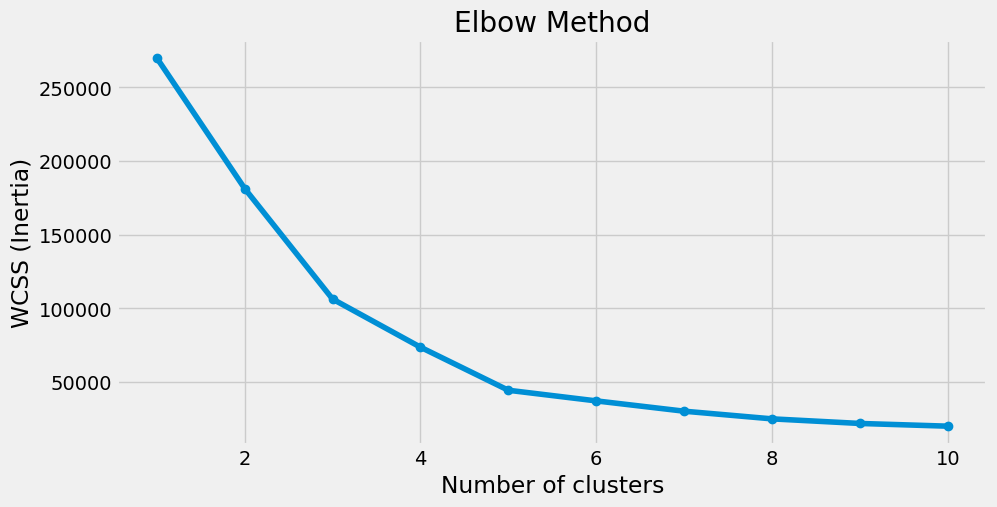

In [82]:
#### Display Elbow Plot
cluster_X2.display_elbow_plot()

In [83]:
cluster_labels_X2 = cluster_X2.run_kmeans(n_clusters=5)

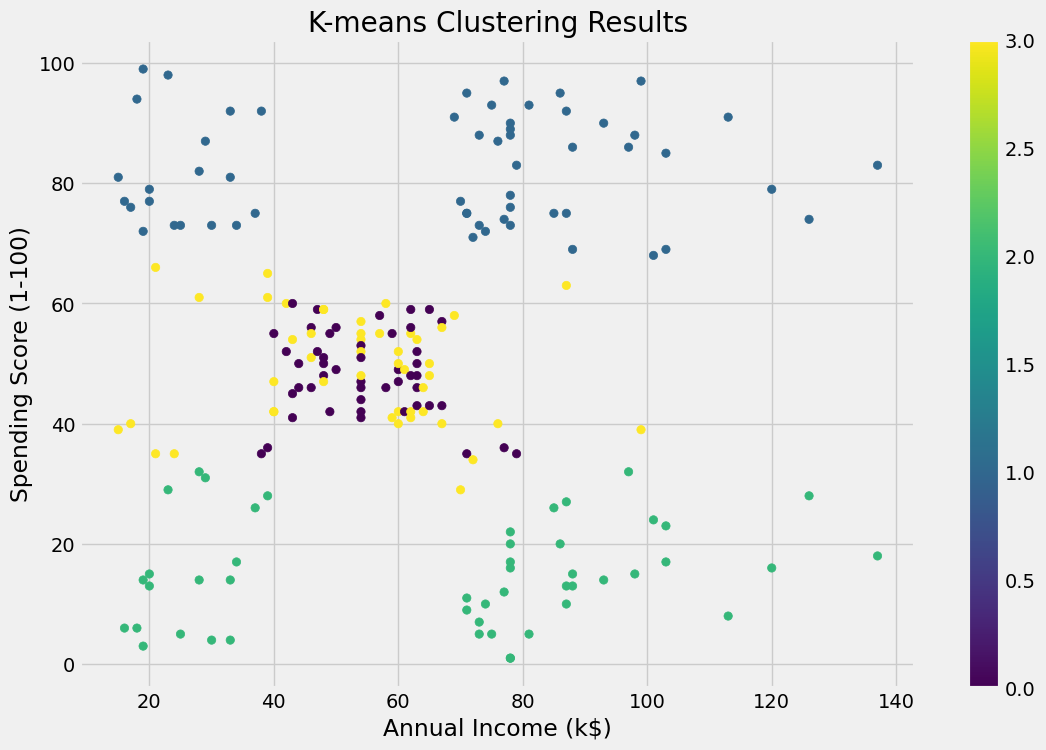

In [84]:
#### Visualize Clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_X2['Annual Income (k$)'], data_X2['Spending Score (1-100)'], c=cluster_labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

In [87]:
get_silhouette_eval(data_X2, cluster_labels_X2)

Average Silhouette Score: 0.553931997444648


In [88]:
get_davies_bouldin_score(data_X2, cluster_labels_X2)

Davies-Bouldin Index: 0.5725628995597082


In [89]:
get_inertia_score(cluster_X2.inertias)

Inertia: 20072.070939404006


In [90]:
get_cluster_summary(data_X2)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 54.770833               48.229167
1                 66.070175               82.350877
2                 66.937500               15.020833
3                 53.276596               49.148936


##### Round 3: Age, Spending Score, and Annual Income

In [91]:
#### Initialize with class
cluster_X3 = KMeansClustering(data_X3)

In [92]:
#### Find Inertias
cluster_X3.find_inertias(max_clusters=10)

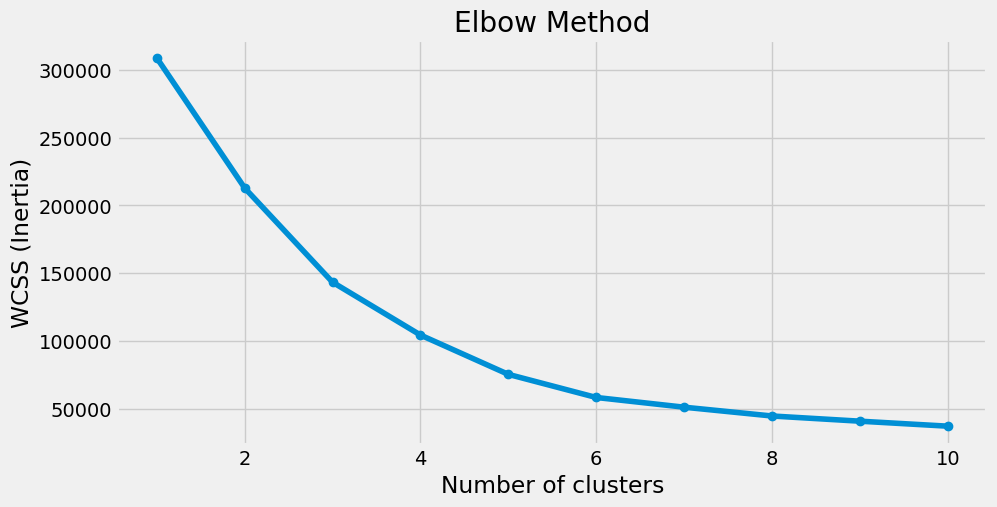

In [93]:
#### Display Elbow Plot
cluster_X3.display_elbow_plot()

In [94]:
cluster_labels_X3 = cluster_X3.run_kmeans(n_clusters=5)

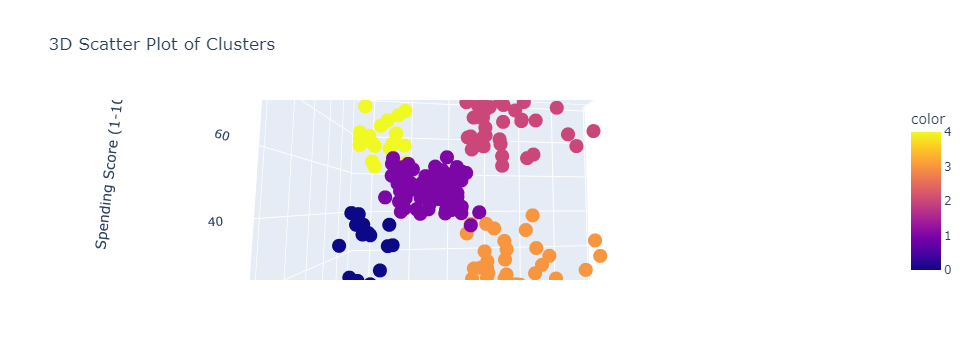

In [108]:
#### Visualize Clusters
fig = px.scatter_3d(data_X3, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color=cluster_labels_X3, title='3D Scatter Plot of Clusters',
                    labels={'Age': 'Age', 'Annual Income (k$)': 'Annual Income (k$)', 'Spending Score (1-100)': 'Spending Score (1-100)'})
fig.show()

In [109]:
get_silhouette_eval(data_X3, cluster_labels_X3)

Average Silhouette Score: 0.44428597560893024


In [110]:
get_davies_bouldin_score(data_X3, cluster_labels_X3)

Davies-Bouldin Index: 0.8218781633199781


In [111]:
get_inertia_score(cluster_X3.inertias)

Inertia: 37128.00867935385


In [112]:
get_cluster_summary(data_X3)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.708333           54.770833               48.229167
1        30.175439           66.070175               82.350877
2        43.291667           66.937500               15.020833
3        27.617021           53.276596               49.148936


#### Data Scaling

##### Standard Scaler

In [125]:
data_X1_scaled_std = scale_data(data_X1)
data_X1_scaled_std.describe()

,Age,Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.910021e+00
25%,-7.248436e-01,-5.997931e-01
50%,-2.045351e-01,-7.764312e-03
75%,7.284319e-01,8.851316e-01
max,2.235532e+00,1.894492e+00


In [126]:
data_X2_scaled_std = scale_data(data_X2)
data_X2_scaled_std.describe()

,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [127]:
data_X3_scaled_std = scale_data(data_X3)
data_X3_scaled_std.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


##### Round 1: Age and Spending Score Standard Scaler

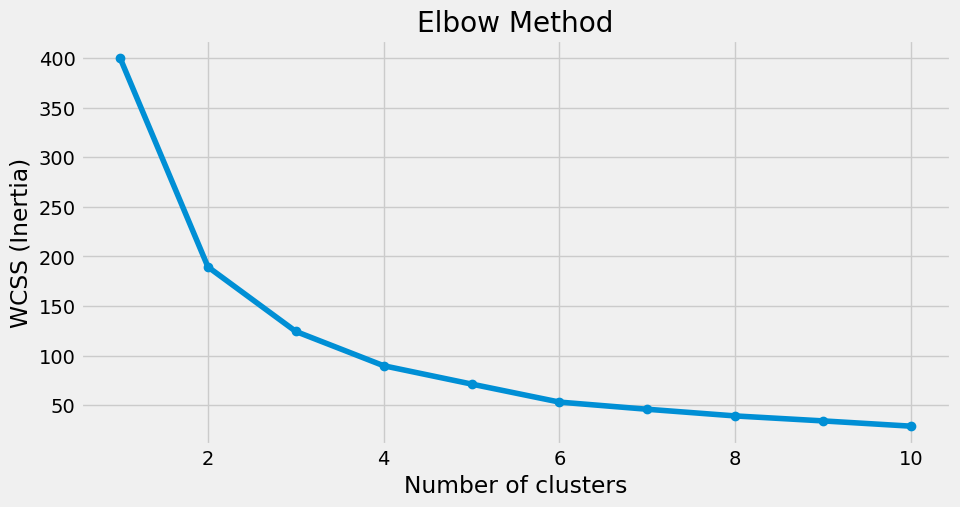

In [131]:
#### Initialize with class
cluster_X1_scaled_std = KMeansClustering(data_X1_scaled_std)

#### Find Inertias
cluster_X1_scaled_std.find_inertias(max_clusters=10)

#### Display Elbow Plot
cluster_X1_scaled_std.display_elbow_plot()

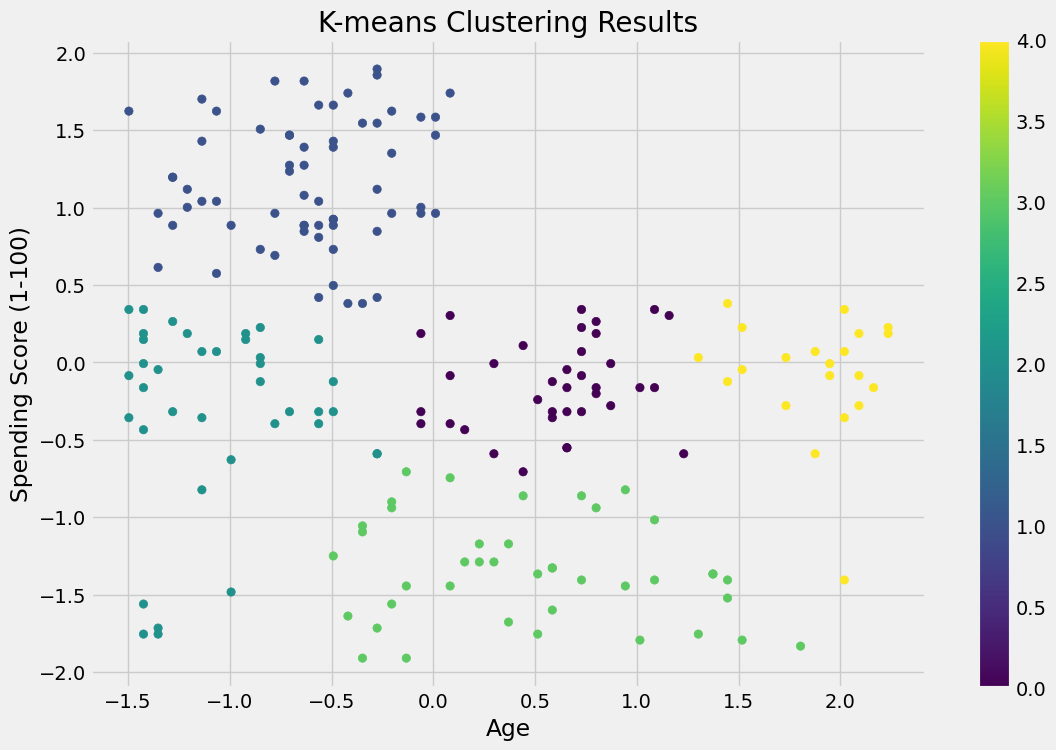

In [133]:
cluster_labels_X1_scaled_std = cluster_X1_scaled_std.run_kmeans(n_clusters=5)
#### Visualize Clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_X1_scaled_std['Age'], data_X1_scaled_std['Spending Score (1-100)'], c=cluster_labels_X1_scaled_std, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

In [134]:
get_silhouette_eval(data_X1_scaled_std, cluster_labels_X1_scaled_std)
get_davies_bouldin_score(data_X1_scaled_std, cluster_labels_X1_scaled_std)
get_inertia_score(cluster_X1_scaled_std.inertias)
get_cluster_summary(data_X1_scaled_std)

Average Silhouette Score: 0.44754858878462783
Davies-Bouldin Index: 0.7570538193682085
Inertia: 28.861661066694083
              Age  Spending Score (1-100)
Cluster                                  
0        1.209867               -0.076511
1       -0.622545                1.248147
2        0.318764               -1.365710
3       -0.806154               -0.040804


##### Round 2: Annual Income and Spending Score Standard Scaler

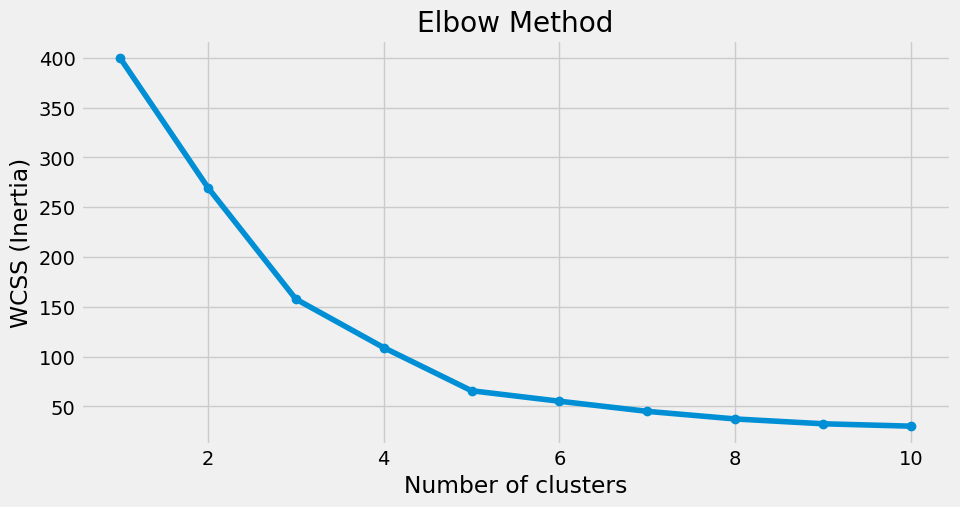

In [135]:
#### Initialize with class
cluster_X2_scaled_std = KMeansClustering(data_X2_scaled_std)

#### Find Inertias
cluster_X2_scaled_std.find_inertias(max_clusters=10)

#### Display Elbow Plot
cluster_X2_scaled_std.display_elbow_plot()

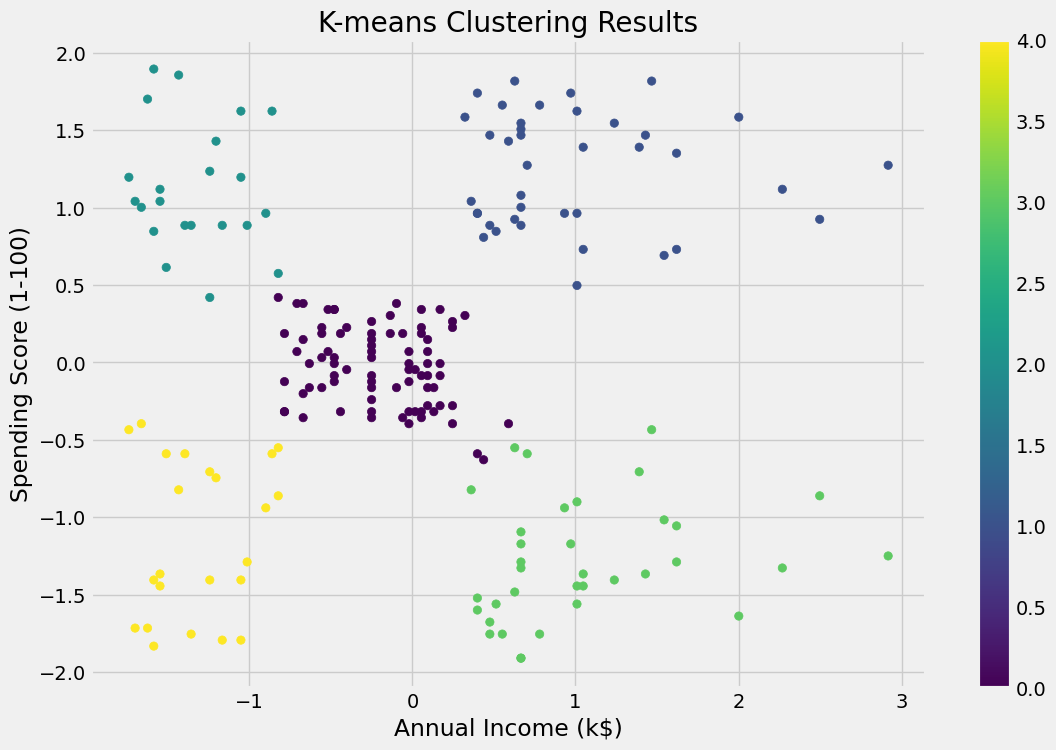

In [136]:
cluster_labels_X2_scaled_std = cluster_X2_scaled_std.run_kmeans(n_clusters=5)
#### Visualize Clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_X2_scaled_std['Annual Income (k$)'], data_X2_scaled_std['Spending Score (1-100)'], c=cluster_labels_X2_scaled_std, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

In [137]:
get_silhouette_eval(data_X2_scaled_std, cluster_labels_X2_scaled_std)
get_davies_bouldin_score(data_X2_scaled_std, cluster_labels_X2_scaled_std)
get_inertia_score(cluster_X2_scaled_std.inertias)
get_cluster_summary(data_X2_scaled_std)

Average Silhouette Score: 0.5546571631111091
Davies-Bouldin Index: 0.5722356162263352
Inertia: 29.981897788243693
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 -0.220969               -0.076511
1                  0.210320                1.248147
2                  0.243426               -1.365710
3                 -0.278003               -0.040804


##### Round 3: Age, Annual Income, Spending Score Standard Scaler

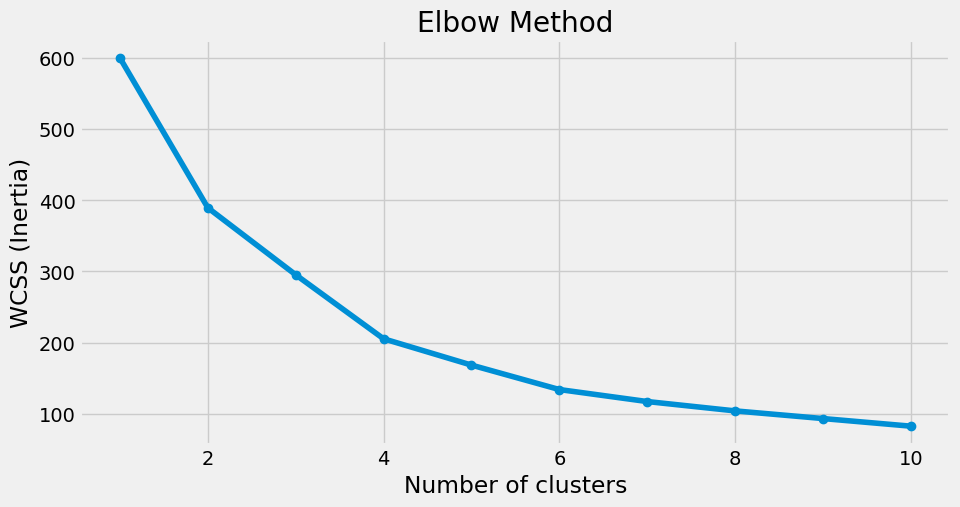

In [138]:
#### Initialize with class
cluster_X3_scaled_std = KMeansClustering(data_X3_scaled_std)

#### Find Inertias
cluster_X3_scaled_std.find_inertias(max_clusters=10)

#### Display Elbow Plot
cluster_X3_scaled_std.display_elbow_plot()

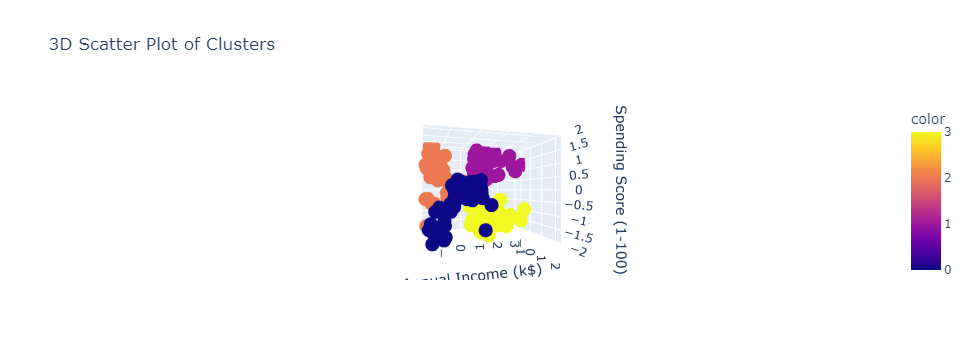

In [139]:
cluster_labels_X3_scaled_std = cluster_X3_scaled_std.run_kmeans(n_clusters=4)
#### Visualize Clusters
fig = px.scatter_3d(data_X3_scaled_std, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color=cluster_labels_X3_scaled_std, title='3D Scatter Plot of Clusters',
                    labels={'Age': 'Age', 'Annual Income (k$)': 'Annual Income (k$)', 'Spending Score (1-100)': 'Spending Score (1-100)'})
fig.show()

In [140]:
get_silhouette_eval(data_X3_scaled_std, cluster_labels_X3_scaled_std)
get_davies_bouldin_score(data_X3_scaled_std, cluster_labels_X3_scaled_std)
get_inertia_score(cluster_X3_scaled_std.inertias)
get_cluster_summary(data_X3_scaled_std)

Average Silhouette Score: 0.4039582785148566
Davies-Bouldin Index: 0.9307956868103672
Inertia: 82.385153645266
              Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        1.209867           -0.220969               -0.076511
1       -0.622545            0.210320                1.248147
2        0.318764            0.243426               -1.365710
3       -0.806154           -0.278003               -0.040804
